<a href="https://colab.research.google.com/github/TemiOyee/EV_MarketSizeAnalysis/blob/main/Electric_Vehicles_Market_Size_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electric Vehicle Market Size Analysis**

# Problem Statement
The objective of this project is to perform a comprehensive market size analysis for electric vehicles (EVs) in a specific region. By leveraging a dataset containing information about the EV population, we aim to gain insights into various aspects, including adoption patterns over time, geographical distribution, popular models and makes, technological advancements in electric range, and forecasting future market growth. These insights will contribute to a better understanding of the EV market landscape and its potential for growth.

# Aims and Objectives
1. Analyze EV adoption over time: Understand the growth trend of the EV population by examining the number of vehicles registered across different model years.
2. Identify geographical hotspots: Determine the counties and cities with the highest concentration of EV registrations, highlighting the areas with significant EV adoption.
3. Explore EV types: Investigate the distribution of different electric vehicle types (e.g., Battery Electric Vehicles, Plug-in Hybrid Electric Vehicles) in the dataset.
4. Evaluate make and model popularity: Identify the most popular EV makes and models based on the number of registered vehicles.
5. Assess electric range capabilities: Analyze the distribution of electric ranges across the EV population and track the progress of EV technology over time.
6. Forecast future market growth: Develop a model to forecast the future growth of the EV market based on historical registration data.








# Data Description
The dataset provided contains information about the EV population in a specific region, likely the state of Washington. It includes details such as the Vehicle Identification Number (VIN), county and city of registration, make and model, electric vehicle type, electric range, manufacturer's suggested retail price (MSRP), legislative district, vehicle location, electric utility provider, and census tract information.

 [Link to Dataset](https://drive.google.com/file/d/1OkoQC9hIwZyXGcH6_X9cAsa_4SEEwWdv/view?usp=drive_link)

# Methodology
The analysis is conducted using Python and several data analysis libraries, including Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and SciPy for curve fitting and forecasting. The methodology involves the following steps:

1. Data Preparation: Load the dataset, handle missing values, and perform any necessary data cleaning or preprocessing.
2. Exploratory Data Analysis: Explore the dataset by visualizing various aspects, such as EV adoption over time, geographical distribution, EV types, and make and model popularity.
3. Electric Range Analysis: Investigate the distribution of electric ranges and examine the progress of EV technology by analyzing the average electric range by model year and across different makes and models.
4. Forecasting: Fit an exponential growth model to the historical EV registration data and forecast the future growth of the EV market.
5. Visualization: Create informative and visually appealing plots and charts to present the findings and insights from the analysis.

# **Code Implementation**

Data Preparation

In [ ]:
import pandas as pd

ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA        98122        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA        98021        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA        98109        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA        98027        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA        98392        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

DATA CLEANING

In [ ]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100084 entries, 0 to 100083
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         100084 non-null  object 
 1   County                                             100084 non-null  object 
 2   City                                               100084 non-null  object 
 3   State                                              100084 non-null  object 
 4   Postal Code                                        100084 non-null  int64  
 5   Model Year                                         100084 non-null  int64  
 6   Make                                               100084 non-null  object 
 7   Model                                              100084 non-null  object 
 8   Electric Vehicle Type                              100084 non-null  object

In [ ]:
ev_data.isnull().sum()

VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 23
DOL Vehicle ID                                        0
Vehicle Location                                      0
Electric Utility                                      0
2020 Census Tract                                     1
dtype: int64

In [ ]:
print(ev_data.dtypes, "t", ev_data.isnull().sum())


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [ ]:
ev_data = ev_data.dropna()

In [ ]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# **Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## **EV Adoption Over Time**
In this part, we analyze the growth of the EV population by model year. We import the necessary plotting libraries (Matplotlib and Seaborn) and set the plotting style. We then create a bar plot showing the number of vehicles registered for each model year. This visualization helps us understand the adoption trend of EVs over time.

<ipython-input-71-6c8cfac00b04>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




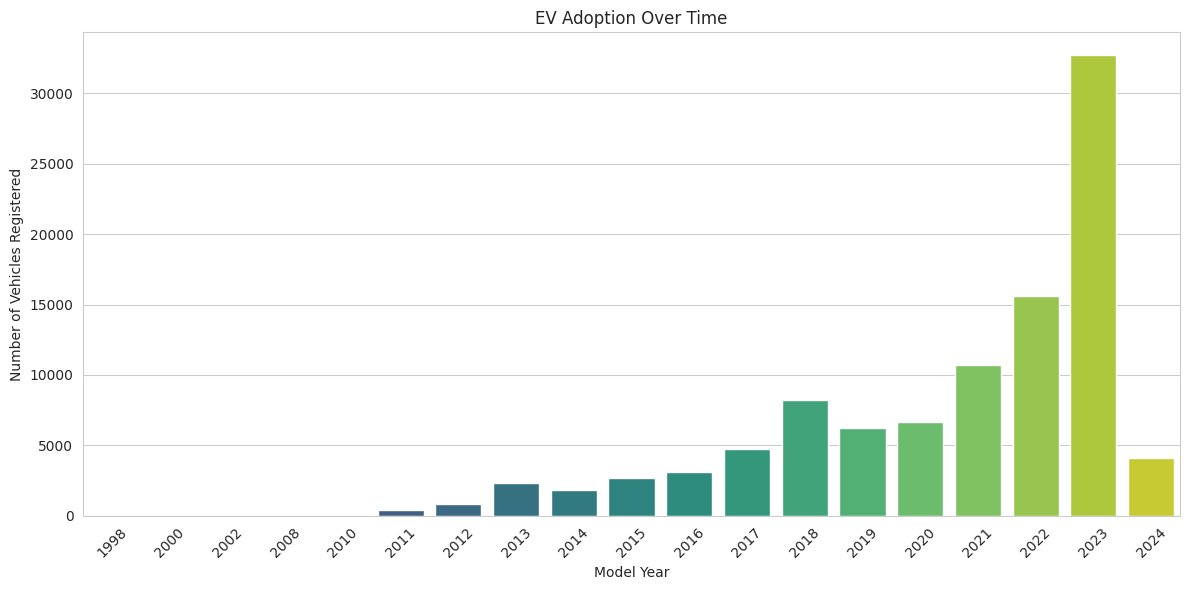

In [ ]:
# EV Adoption Over Time: Analyze the growth of the EV population by model year

plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Geographical Distribution**
 This section focuses on understanding the geographical distribution of EV registrations. We first identify the top 3 counties with the highest number of EV registrations. Then, we filter the dataset to include only these top counties and analyze the distribution of EVs within the cities of these counties. We create a bar plot showing the top 10 cities across these counties, grouped by county, to visualize the areas with the highest EV adoption.

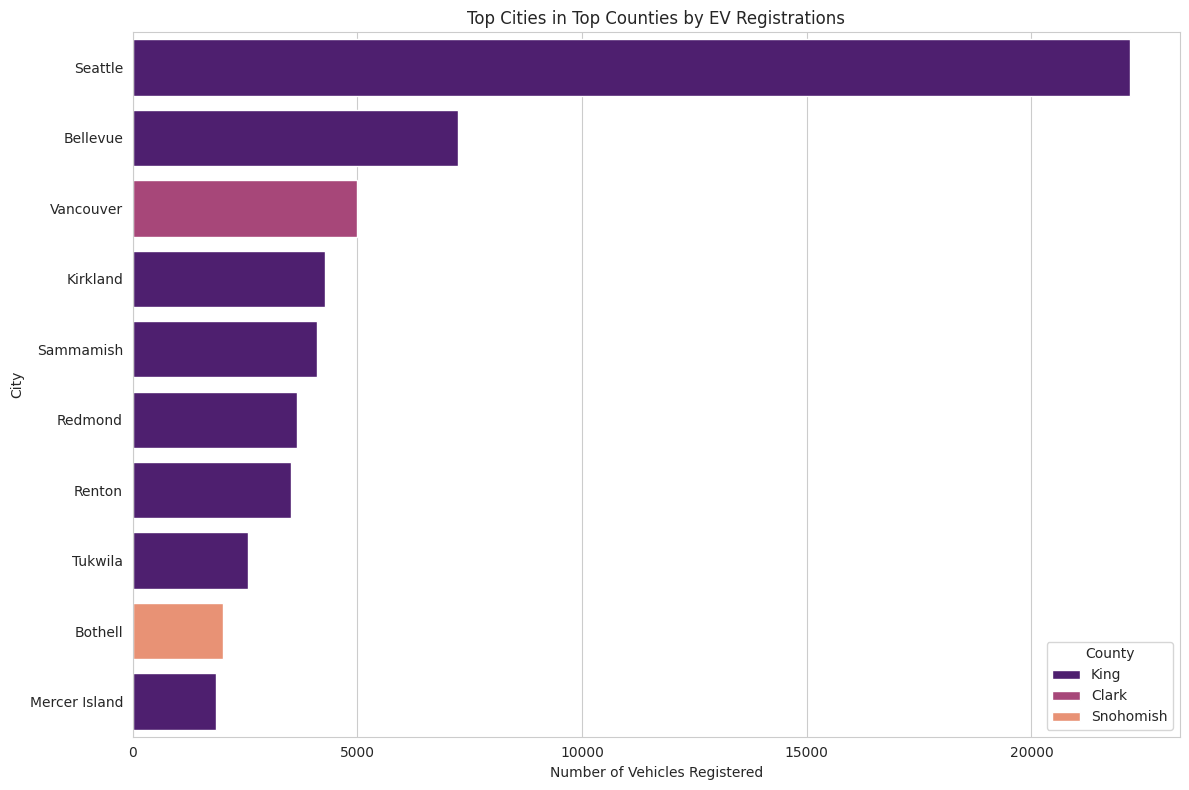

In [ ]:


ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

## **EV Types**
In this part, we explore the distribution of different electric vehicle types (e.g., Battery Electric Vehicles, Plug-in Hybrid Electric Vehicles) present in the dataset. We create a bar plot showing the count of vehicles for each EV type, providing insights into the market share of various EV technologies.

<ipython-input-73-c57f63b17c31>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




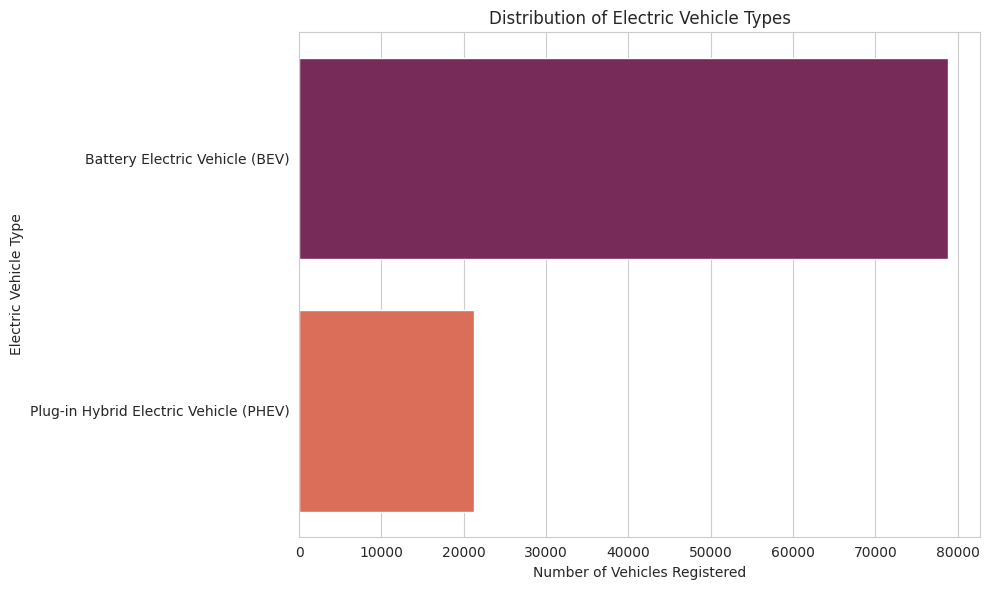

In [ ]:

ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

## **Make and Model Popularity**
This section focuses on identifying the most popular EV makes and models based on the number of registered vehicles. We first create a bar plot showing the top 10 EV makes by registration count.

<ipython-input-74-8baba8df8b7f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




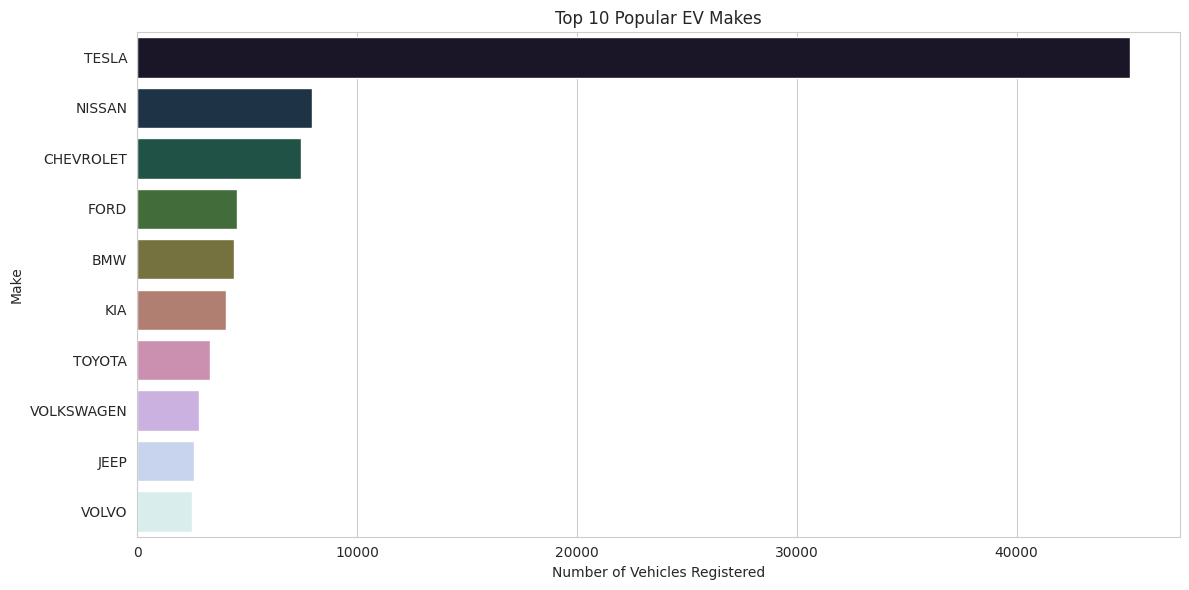

In [ ]:


ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

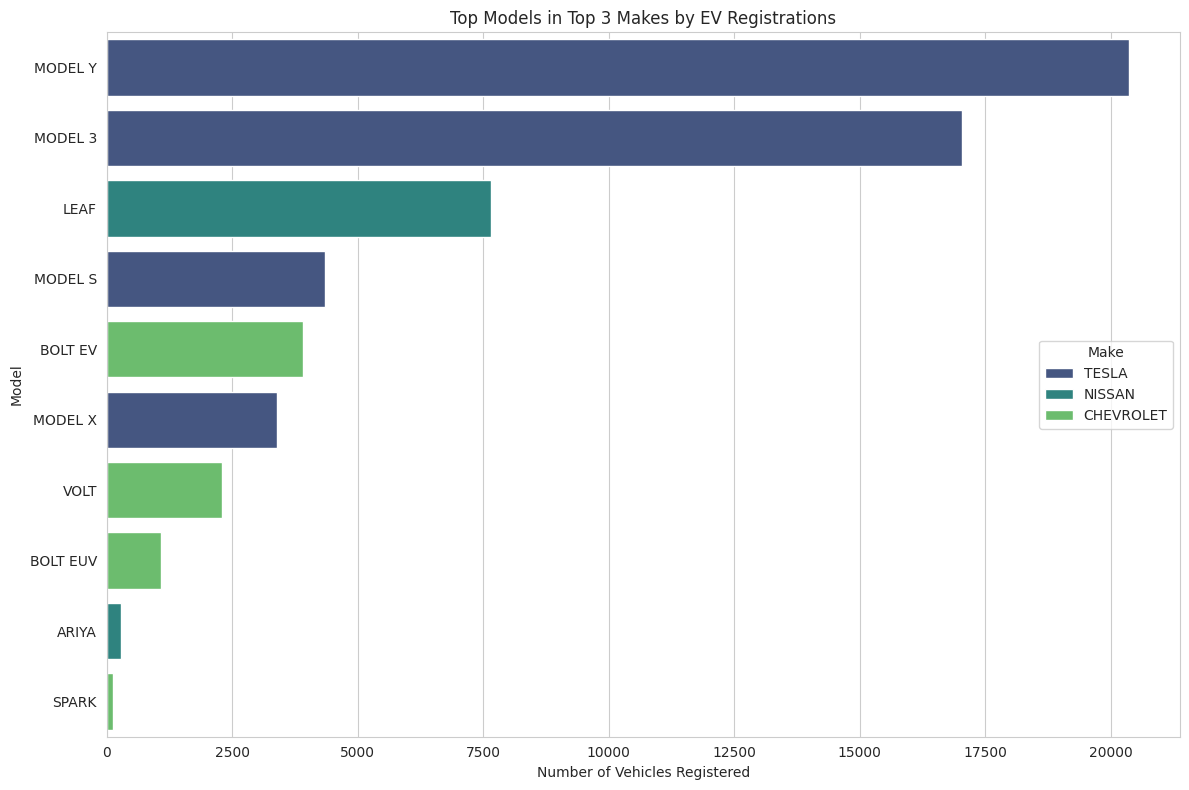

In [ ]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

## **Electric Range Analysis**

In this section, we analyze the electric range capabilities of the EVs in the dataset. We begin by creating a histogram to visualize the distribution of electric ranges across the entire EV population. We also plot the mean electric range as a reference line.

Next, we examine the progress of EV technology by analyzing the average electric range by model year. We create a line plot to visualize the trend of increasing electric range over time.

Additionally, we identify the top 10 EV models with the highest average electric range among the top 3 makes. This analysis provides insights into the models leading the way in terms of extended electric range capabilities.

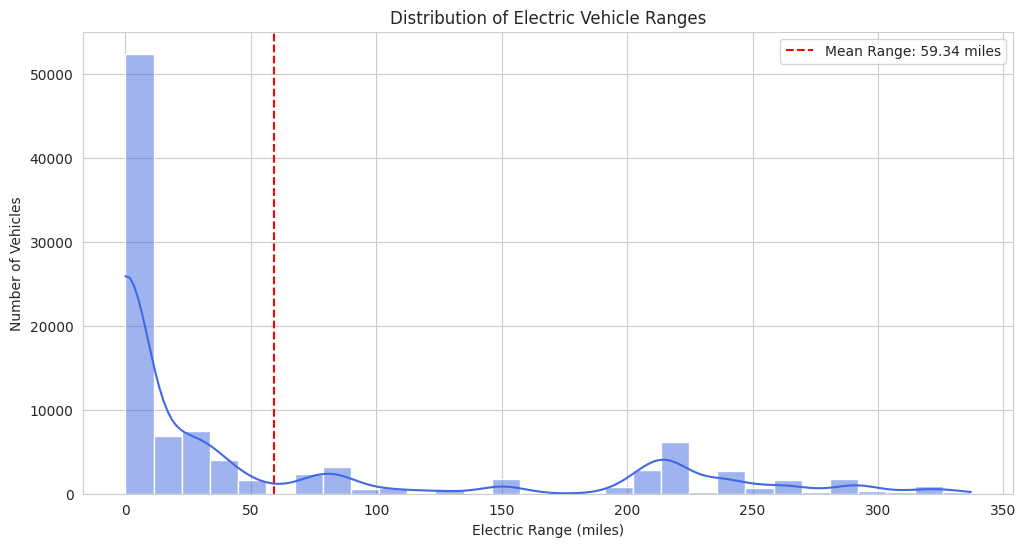

In [ ]:
#Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

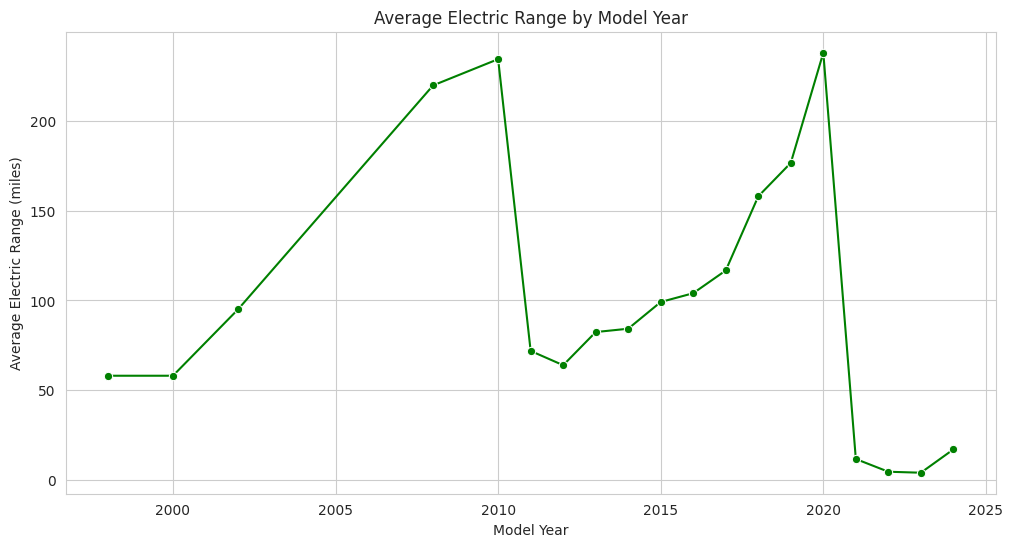

In [ ]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

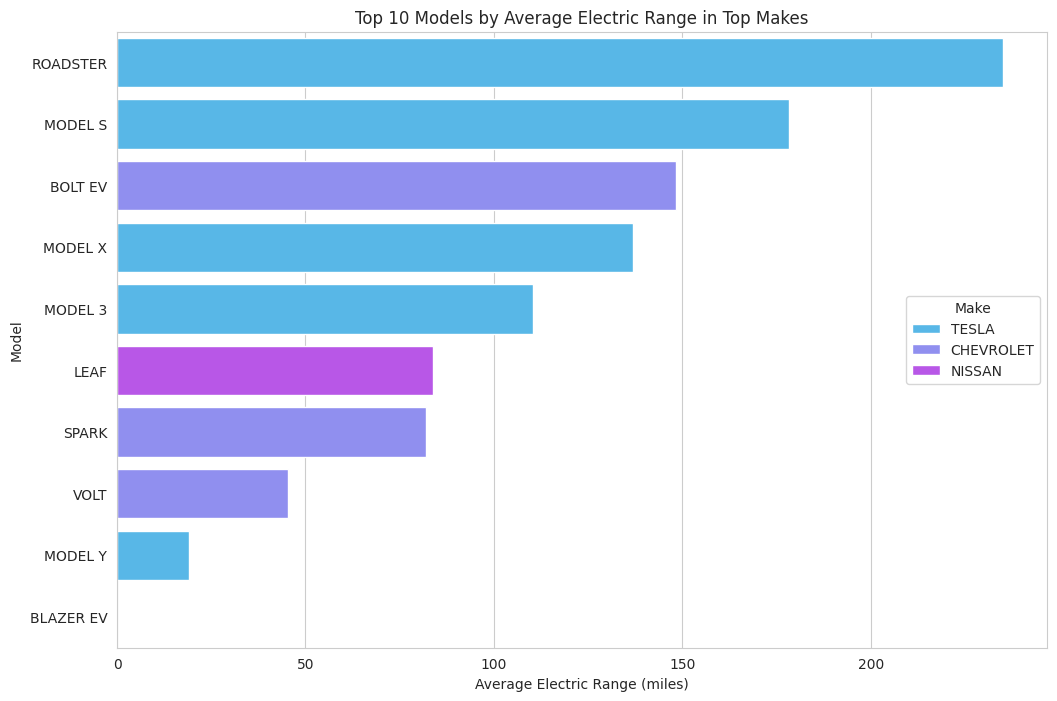

In [ ]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

# **Forecasting Future Market Growth**

Analyze and find the estimated growth in the market size of electric vehicles.

In [ ]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1998        1
2000        3
2002        1
2008       12
2010       14
2011      428
2012      834
2013     2337
2014     1853
2015     2653
2016     3085
2017     4708
2018     8205
2019     6210
2020     6637
2021    10688
2022    15588
2023    32703
2024     4100
Name: count, dtype: int64

In [ ]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 45201.25727752087, 2025: 68745.46757453901, 2026: 104553.27122929951, 2027: 159012.46890051092, 2028: 241838.10767988922, 2029: 367805.5609763674}


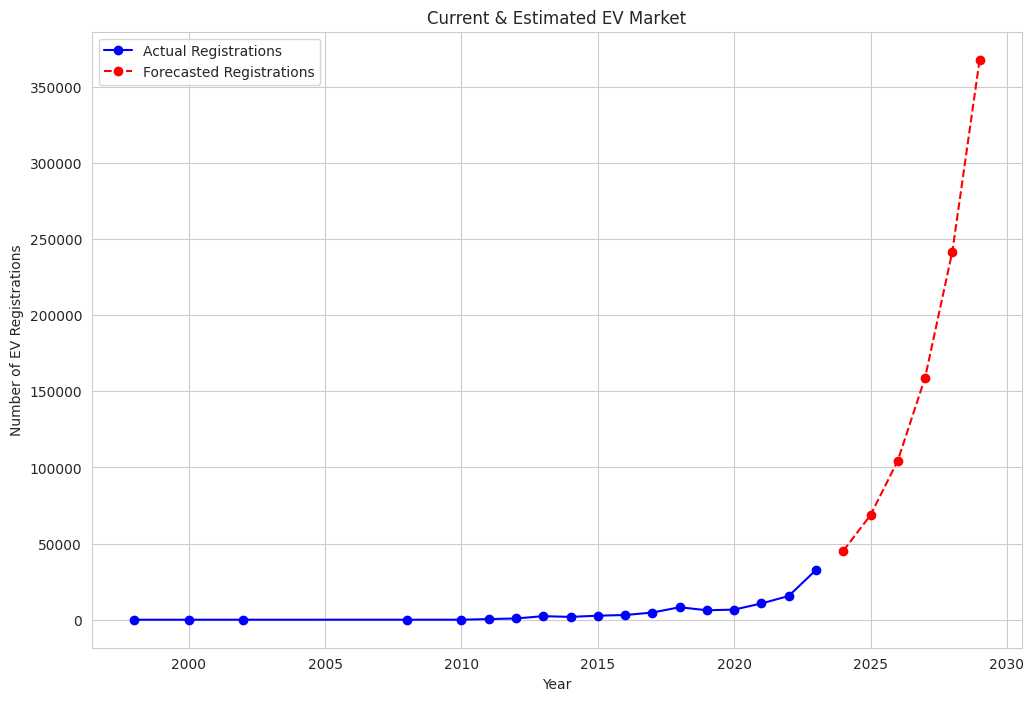

In [ ]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
print(ev_data.shape)

(100060, 17)


In [ ]:
print(np.arange(ev_data['Model Year'].min(), 2029 + 1).shape)
print(np.cumsum(ev_data['Model Year'].value_counts().sort_index().values).shape)

(32,)
(19,)


In [ ]:
x = np.arange(ev_data['Model Year'].min(), 2029 + 1)[:19]

In [ ]:
y = np.pad(np.cumsum(ev_data['Model Year'].value_counts().sort_index().values), (0, 13), 'constant')

In this final section, we attempt to forecast the future growth of the EV market based on historical registration data. We start by calculating the number of EV registrations for each model year.

We then employ an exponential growth model to fit the historical data. We filter the dataset to include only years with complete data, assuming 2023 is the last complete year. We define an exponential growth function and use SciPy's curve_fit function to find the best-fit parameters for the model.

With the fitted model, we forecast the number of EV registrations for the next 5 years (2024-2028). We print the forecasted values for each year and create a dictionary for easier interpretation.

Finally, we visualize the actual and forecasted EV registrations on a line plot, allowing us to observe the projected market growth trend based on the exponential growth model.

# **DASHBOARD CREATION**

In [ ]:
pip install dash


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Read the data
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Clean the data (drop rows with missing values)
ev_data = ev_data.dropna()

# Calculate cumulative sum of EV registrations by year
cumulative_registrations = ev_data['Model Year'].value_counts().sort_index().cumsum()

# Create Dash app
app = dash.Dash(__name__)

# Define layout of the dashboard
app.layout = html.Div([
    html.H1("Electric Vehicle Dashboard"),

    # EV Adoption Over Time
    html.Div([
        html.H2("EV Adoption Over Time"),
        dcc.Graph(figure=px.bar(ev_data['Model Year'].value_counts().sort_index(),
                                x=ev_data['Model Year'].value_counts().sort_index().index,
                                y=ev_data['Model Year'].value_counts().sort_index().values,
                                labels={'x': 'Model Year', 'y': 'Number of Vehicles Registered'}))
    ]),

    # Geographical Distribution
    html.Div([
        html.H2("Geographical Distribution"),
        dcc.Graph(figure=px.bar(ev_data['County'].value_counts().head(3).reset_index(),
                                x='County', y='County',
                                labels={'x': 'County', 'y': 'Number of Vehicles Registered'},
                                barmode='group'))
    ]),

    # EV Types Distribution
    html.Div([
        html.H2("EV Types Distribution"),
        dcc.Graph(figure=px.bar(ev_data['Electric Vehicle Type'].value_counts().reset_index(),
                                x='Electric Vehicle Type', y='Electric Vehicle Type',
                                labels={'x': 'Electric Vehicle Type', 'y': 'Number of Vehicles Registered'}))
    ]),

    # Make and Model Popularity
    html.Div([
        html.H2("Make and Model Popularity"),
        dcc.Graph(figure=px.bar(ev_data['Make'].value_counts().head(10).reset_index(),
                                x='Make', y='Make',
                                labels={'x': 'Make', 'y': 'Number of Vehicles Registered'}))
    ]),

    # Electric Range Analysis
    html.Div([
        html.H2("Electric Range Analysis"),
        dcc.Graph(figure=px.histogram(ev_data, x='Electric Range', nbins=30,
                                      title='Distribution of Electric Vehicle Ranges'))
    ]),

    # Forecasted EV Registrations
    html.Div([
        html.H2("Forecasted EV Registrations"),
        dcc.Graph(figure=px.line(x=cumulative_registrations.index,
                                  y=cumulative_registrations.values,
                                  title='Current & Estimated EV Market'))
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Read the data
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Clean the data (drop rows with missing values)
ev_data = ev_data.dropna()

# Calculate cumulative sum of EV registrations by year
cumulative_registrations = ev_data['Model Year'].value_counts().sort_index().cumsum()

# Create Dash app
app = dash.Dash(__name__)

# Define layout of the dashboard
app.layout = html.Div([
    html.H1("Electric Vehicle Dashboard"),

    # Dropdown for selecting metric
    html.Div([
        dcc.Dropdown(
            id='metric-dropdown',
            options=[
                {'label': 'EV Adoption Over Time', 'value': 'adoption'},
                {'label': 'Geographical Distribution', 'value': 'geo_distribution'},
                {'label': 'EV Types Distribution', 'value': 'ev_types'},
                {'label': 'Make and Model Popularity', 'value': 'make_model'},
                {'label': 'Electric Range Analysis', 'value': 'range_analysis'},
                {'label': 'Forecasted EV Registrations', 'value': 'forecast'}
            ],
            value='adoption',
            clearable=False
        )
    ]),

    # Placeholder for selected metric
    html.Div(id='metric-container'),
])

# Callback to update selected metric
@app.callback(
    Output('metric-container', 'children'),
    [Input('metric-dropdown', 'value')]
)
def update_metric(metric):
    if metric == 'adoption':
        return dcc.Graph(
            figure=px.bar(ev_data['Model Year'].value_counts().sort_index(),
                           x=ev_data['Model Year'].value_counts().sort_index().index,
                           y=ev_data['Model Year'].value_counts().sort_index().values,
                           labels={'x': 'Model Year', 'y': 'Number of Vehicles Registered'},
                           title='EV Adoption Over Time')
        )
    elif metric == 'geo_distribution':
        return dcc.Graph(
            figure=px.bar(ev_data['County'].value_counts().head(3).reset_index(),
                           x='County', y='County',
                           labels={'x': 'County', 'y': 'Number of Vehicles Registered'},
                           barmode='group',
                           title='Geographical Distribution')
        )
    elif metric == 'ev_types':
        return dcc.Graph(
            figure=px.bar(ev_data['Electric Vehicle Type'].value_counts().reset_index(),
                           x='Electric Vehicle Type', y='Electric Vehicle Type',
                           labels={'x': 'Electric Vehicle Type', 'y': 'Number of Vehicles Registered'},
                           title='EV Types Distribution')
        )
    elif metric == 'make_model':
        return dcc.Graph(
            figure=px.bar(ev_data['Make'].value_counts().head(10).reset_index(),
                           x='Make', y='Make',
                           labels={'x': 'Make', 'y': 'Number of Vehicles Registered'},
                           title='Make and Model Popularity')
        )
    elif metric == 'range_analysis':
        return dcc.Graph(
            figure=px.histogram(ev_data, x='Electric Range', nbins=30,
                                title='Electric Range Analysis')
        )
    elif metric == 'forecast':
        return dcc.Graph(
            figure=px.line(x=cumulative_registrations.index,
                           y=cumulative_registrations.values,
                           title='Forecasted EV Registrations')
        )

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>